In [7]:
import ROOT
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt

In [8]:
df = ROOT.RDataFrame("randomParticles", "./allpart.root")

In [9]:
secondary_type = df.AsNumpy(['fSecondaryType'])
sec_id = secondary_type['fSecondaryType']

In [39]:
part_id = {1 : 'gamma', 2 : 'e+', 3 : 'e-',
          5 : 'mu+', 
          6 : 'mu-',
          7 : 'pi0', 8 : 'pi+', 9 : 'pi-',
          10 : 'KL', 11 : 'K+', 12 : 'K-',
          13 : 'n', 14 : 'p', 15 : 'antip'
          }

In [40]:
part_id_lept = {1 : 'gamma', 2 : 'e+', 3 : 'e-',
          5 : 'mu+', 
          6 : 'mu-',
          }

In [41]:
part_id_hadr = {
          7 : 'pi0', 8 : 'pi+', 9 : 'pi-',
          10 : 'KL', 11 : 'K+', 12 : 'K-',
          13 : 'n', 14 : 'p', 15 : 'antip'
          }

In [27]:
part_id_inv = {'gamma' : 1, 'e+' : 2, 'e-' : 3,
          'mu+' : 5, 
          'mu-' : 6,
          'pi0' : 7, 'pi+' : 8, 'pi-' : 9,
          'KL' : 10, 'K+' : 11, 'K-' : 12,
          'n' : 13, 'p' : 14, 'antip' : 15
          }

In [69]:
filters_lept = []
labels_lept = ['gamma', 'e-/e+', 'mu-/mu+']
for pID in part_id_lept: 
    if(pID == 3 or pID == 6) : continue # positron case skipped, it's defined together with electron 
    str_filter = 'fSecondaryType=='+str(pID)
    if(pID == 2 or pID == 5): str_filter += ' or fSecondaryType=='+str(pID+1)
    filters_lept.append(str_filter)

filters_lept

['fSecondaryType==1',
 'fSecondaryType==2 or fSecondaryType==3',
 'fSecondaryType==5 or fSecondaryType==6']

In [76]:
filters_full = []
labels_full = [r'$\gamma$', r'$e^{\pm}$', r'$\mu^{\pm}$', 'n', r'$p/\bar{p}$', r'$\pi$, K']
for pID in part_id: 
    if(pID == 3 or pID == 6 or pID == 8 or pID == 9 or pID == 10 or pID == 11 or pID == 12 or pID == 15) : continue # positron case skipped, it's defined together with electron 
    str_filter = 'fSecondaryType=='+str(pID)
    if(pID == 2 or pID == 5 or pID == 14): str_filter += ' or fSecondaryType=='+str(pID+1)
    if(pID == 7): str_filter += ' or fSecondaryType=='+str(pID+1) + ' or fSecondaryType=='+str(pID+2) + ' or fSecondaryType=='+str(pID+3) + ' or fSecondaryType=='+str(pID+4) + ' or fSecondaryType=='+str(pID+5)
    filters_full.append(str_filter)

filters_full

['fSecondaryType==1',
 'fSecondaryType==2 or fSecondaryType==3',
 'fSecondaryType==5 or fSecondaryType==6',
 'fSecondaryType==7 or fSecondaryType==8 or fSecondaryType==9 or fSecondaryType==10 or fSecondaryType==11 or fSecondaryType==12',
 'fSecondaryType==13',
 'fSecondaryType==14 or fSecondaryType==15']

Filter condition : fSecondaryType==1
Filter condition : fSecondaryType==2
Filter condition : fSecondaryType==3
Filter condition : fSecondaryType==5
Filter condition : fSecondaryType==6


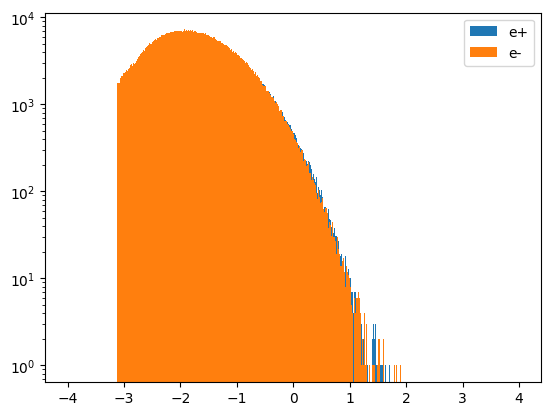

In [49]:
for fltr in part_id_lept: 
    str_filter = 'fSecondaryType=='+str(pID)
    print('Filter condition :',str_filter)
    p_sec = df.Filter(str_filter).AsNumpy(['fPx','fPy','fPz'])
    ptot = np.sqrt(p_sec['fPx']**2 + p_sec['fPy']**2 + p_sec['fPz']**2)
    plt.hist(np.log10(ptot), bins = np.arange(-4,4,0.01), label = part_id[pID],a)

plt.yscale('log')
plt.legend()

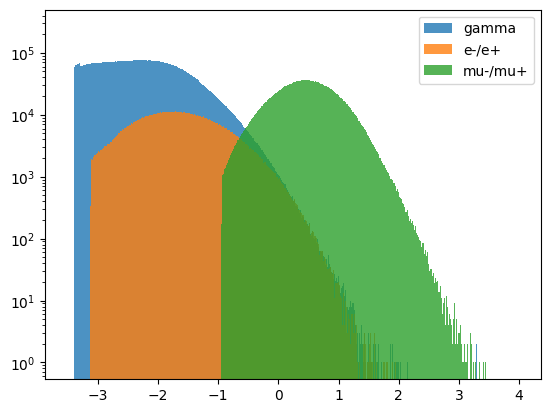

In [71]:
iterator = 0

for fltr in filters_lept: 
    p_sec = df.Filter(fltr).AsNumpy(['fPx','fPy','fPz'])
    ptot = np.sqrt(p_sec['fPx']**2 + p_sec['fPy']**2 + p_sec['fPz']**2)
    plt.hist(np.log10(ptot), bins = np.arange(-3.5,4,0.01), label = labels_lept[iterator], alpha = 0.8)
    iterator += 1

plt.yscale('log')
plt.legend()

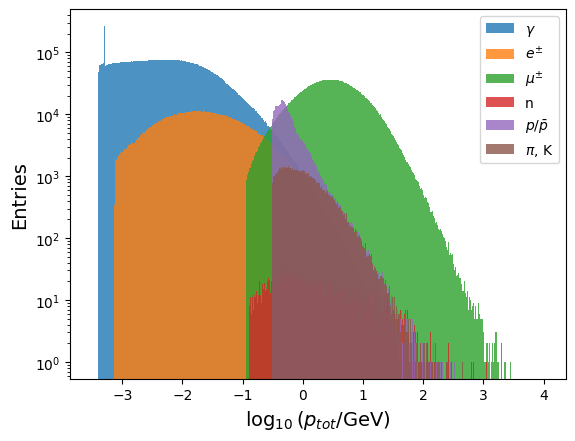

In [87]:
plt.plot(dpi=800)

iterator = 0

for fltr in filters_full: 
    p_sec = df.Filter(fltr).AsNumpy(['fPx','fPy','fPz'])
    ptot = np.sqrt(p_sec['fPx']**2 + p_sec['fPy']**2 + p_sec['fPz']**2)
    plt.hist(np.log10(ptot), bins = np.arange(-3.5,4,0.01), label = labels_full[iterator], alpha = 0.8)
    iterator += 1

plt.xlabel(r'$\log_{10}( p_{tot} / $GeV$ )$', size = 14)
plt.ylabel(r'Entries', size = 14)
plt.yscale('log')
plt.legend()
plt.savefig('momentum_spectra_log.pdf', format='pdf')

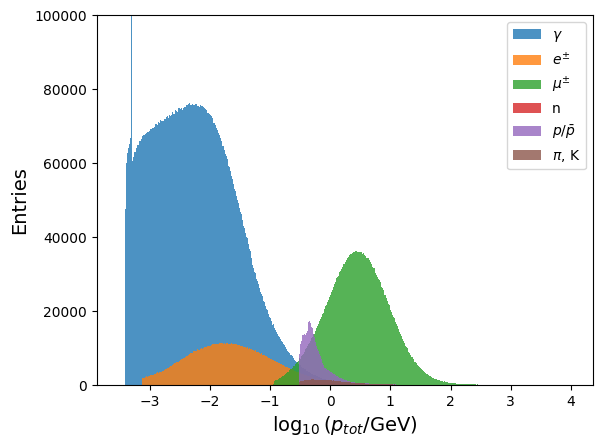

In [86]:
plt.plot(dpi=800)

iterator = 0

for fltr in filters_full: 
    p_sec = df.Filter(fltr).AsNumpy(['fPx','fPy','fPz'])
    ptot = np.sqrt(p_sec['fPx']**2 + p_sec['fPy']**2 + p_sec['fPz']**2)
    plt.hist(np.log10(ptot), bins = np.arange(-3.5,4,0.01), label = labels_full[iterator], alpha = 0.8)
    iterator += 1

plt.ylim(0,1e5)
plt.xlabel(r'$\log_{10}( p_{tot} / $GeV$ )$', size = 14)
plt.ylabel(r'Entries', size = 14)
plt.legend()
plt.savefig('momentum_spectra_lin.pdf', format='pdf')